In [54]:
import importlib
import MyLib
importlib.reload(MyLib)
from MyLib import show_montage # 來自 MyLib.py
import numpy as np
from numpy.linalg import svd
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
import scipy.io

In [4]:
D = scipy.io.loadmat(r'C:\Users\Sheng\Documents\NTPU_Bachelor\Year_4\Y4_Sem_2\ShallowML\ClassData\allFaces.mat')
X = D['faces'] # 32256 x 2410 each column represents an image
y = np.ndarray.flatten(D['nfaces'])
m = D['m'].item() # 168
n = D['n'].item() # 192
n_persons = D['person'].item() # 38

# print the data information
print('X.shape =', X.shape)
print('y.shape =', y.shape)
print('Total number of images =', X.shape[1])
print('Total number of persons =', n_persons)
print('Image size =', m, 'x', n)
print('Number of images for each person =',y) 
print('Total number of images =', y.sum())

X.shape = (32256, 2410)
y.shape = (38,)
Total number of images = 2410
Total number of persons = 38
Image size = 168 x 192
Number of images for each person = [64 62 64 64 62 64 64 64 64 64 60 59 60 63 62 63 63 64 64 64 64 64 64 64
 64 64 64 64 64 64 64 64 64 64 64 64 64 64]
Total number of images = 2410


<font color=yellow>展示所有人（38 人） 的第一張影像圖</font>

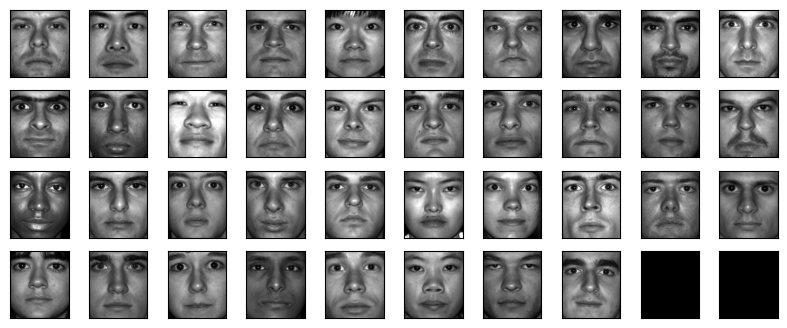

In [ ]:
all_diff_persons = np.zeros((m*n, n_persons))
cnt = 0
cnt = np.int64(cnt)
for i in range(n_persons):
    all_diff_persons[:,i] = X[:,cnt]
    cnt = cnt + y[i]
# check all 38 different persons
show_montage(all_diff_persons, m, n, 4,10)

<font color=yellow>SVD 分解</font>

In [7]:
# avgFace = X.mean(axis=1).reshape(-1, 1)
# X_avg = X - np.tile(avgFace, (1, X.shape[1]))
avgFace = X.mean(axis=1)
X_avg = X - avgFace.reshape(-1,1)
# X_avg = X - avgFace[:, np.newaxis]

U, E, VT = svd(X_avg, full_matrices = False)
print('U.shape =', U.shape)

U.shape = (32256, 2410)


<font color=yellow>範例 2：Display the bases (U) of eignefaces: 來自 2410 人，每人有 32256 個 features </font>

展示 $ \underline{u}_1, \underline{u}_2,\cdots, \underline{u}_{100}$

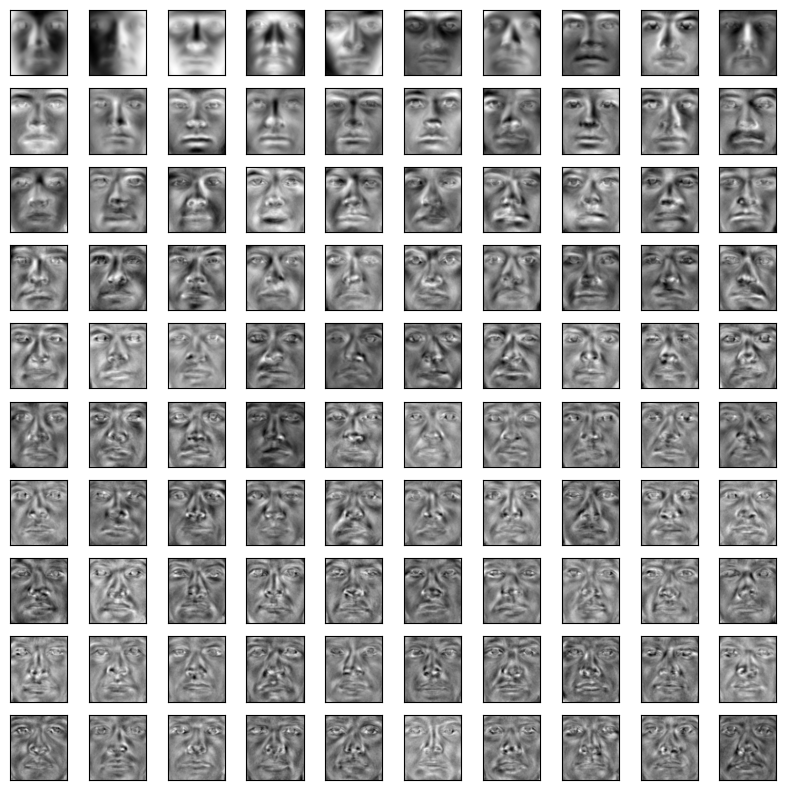

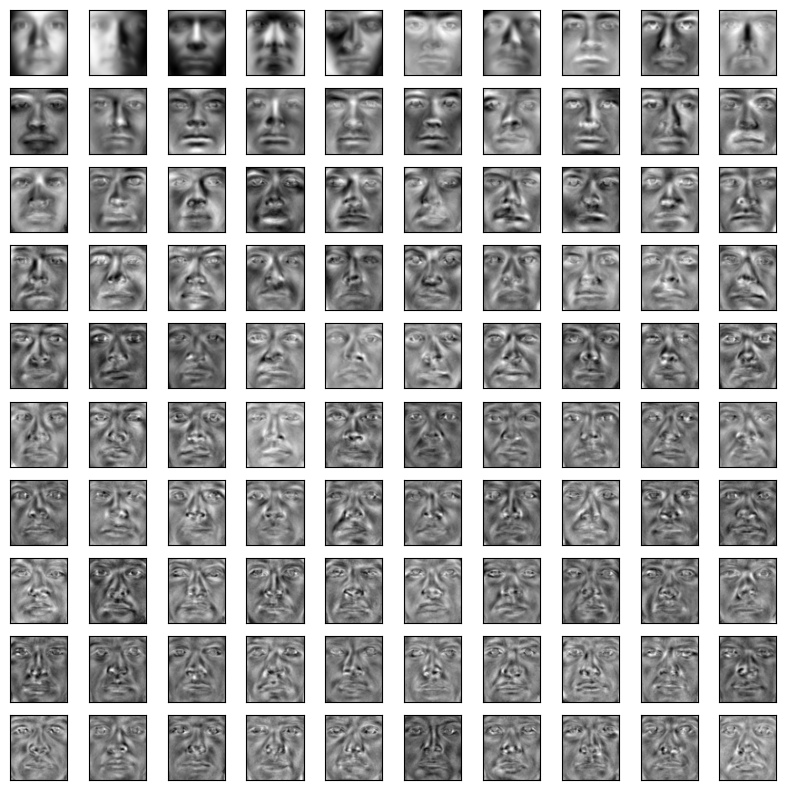

In [ ]:
show_montage(U, m, n, 10, 10) # show the first 100 eigenvectors   

# 255 - U 表示暗亮互換
show_montage(255 - U, m, n, 10, 10)

<font color=yellow>Use TruncatedSVD for U</font>

In [9]:
# use TruncatedSVD to show the first 100 bases

Tsvd = TruncatedSVD(n_components=100, random_state=42) # does not center the data
Tsvd = Tsvd.fit(X.T) # (n_components, n_features)
# Z = svd.fit_transform(X_avg.T) # eigenfaces used for recognition
# Zq = Zq.T

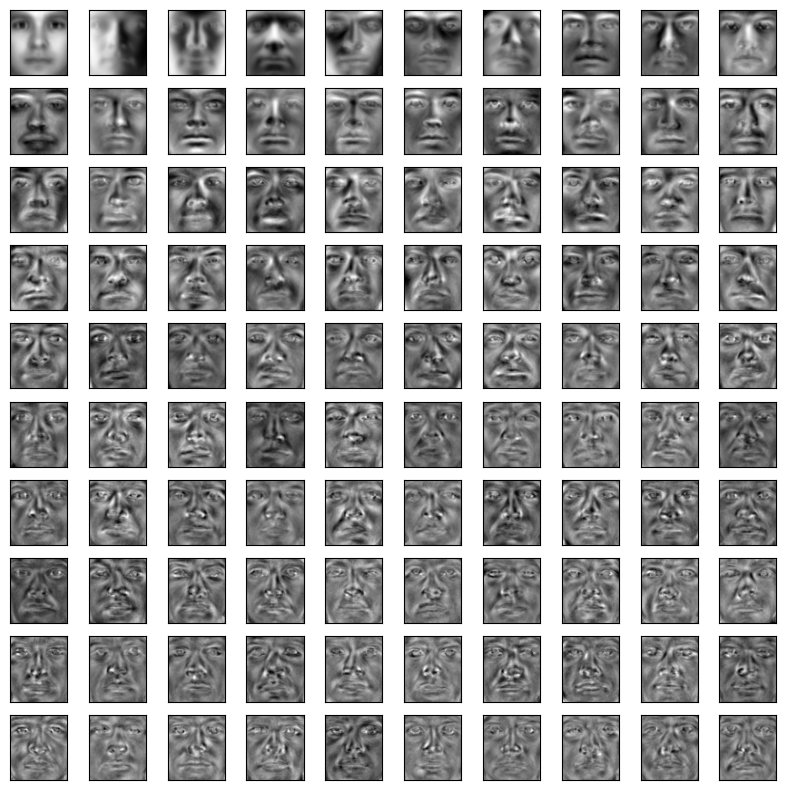

In [ ]:
U = Tsvd.components_.T # right singular vectors
show_montage(U, m, n, 10, 10) 
# show_montage(255 - U, n, m, 10, 10)

<hr>
<font color=yellow>講義範例 3: 展示前 10 張影像（或任意 10 張）及其近似影像 Xq 並列印壓縮倍數</font>

- 展示 $X_q$ 其中 $q=20, 100, 200, 400$
- 分別採 svd 與 TruncatedSVD
- 近似影像是否參與 U 的製作？（範例 4）
<hr>

In [13]:
# do SVD on X
U, E, VT = svd(X, full_matrices = False)

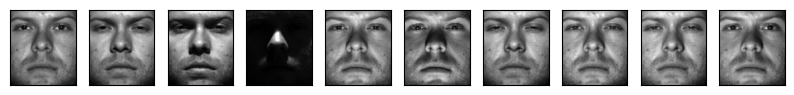

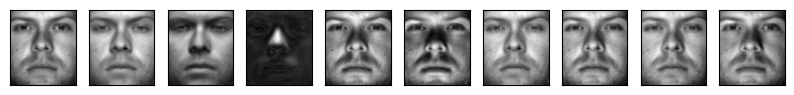

In [ ]:
q = 100
Uq = U[:, :q] # 32256 x 10

# take the first 10 images of X
X_10 = X[:, :10]
Xq = Uq @ (Uq.T @ X_10) # 32256 x 10
show_montage(X_10, m, n, 1, 10) # show the first 10 images
show_montage(Xq, m, n, 1, 10) # show the reconstructed images

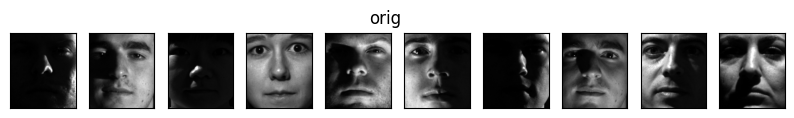

Storage Ratio = %d 224.24554318352276


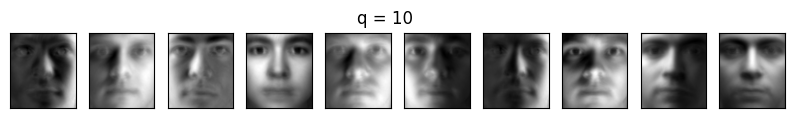

Storage Ratio = %d 22.424554318352275


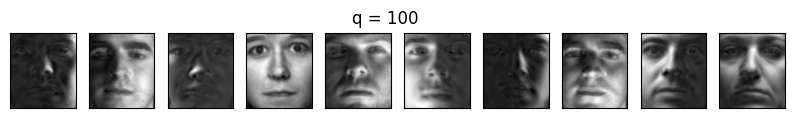

Storage Ratio = %d 11.212277159176137


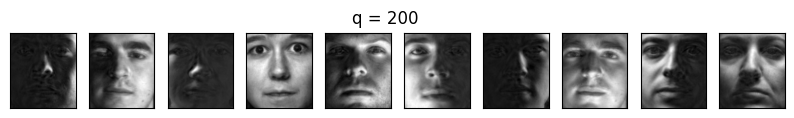

Storage Ratio = %d 5.606138579588069


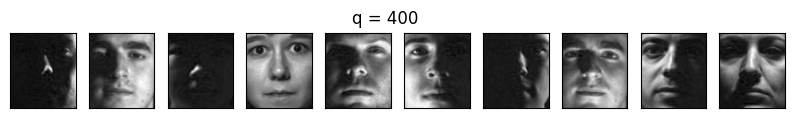

In [ ]:
# X_10 = X[:, :10]
# randomly choose 10 images
X_10 = X[:, np.random.choice(X.shape[1], 10, replace=False)]

# q = 50
# let q be 20, 100, 200, 400
q = [10, 100, 200, 400]
show_montage(X_10, m, n, 1, 10, 'orig') # show the first 10 images
for i in range(len(q)):
    Uq = U[:, :q[i]] # 32256 x 10
    Xq = Uq @ (Uq.T @ X_10) # 32256 x 10
    print('Storage Ratio = ', X.shape[0] * X.shape[1] / (q[i] * X.shape[0] + q[i] * X.shape[1]))
    show_montage(Xq, m, n, 1, 10, 'q = {}'.format(q[i])) # show the reconstructed images
# Uq = U[:, :q] # 32256 x 10

# # take the first 10 images of X
# Xq = Uq @ (Uq.T @ X_10) # 32256 x 10
# show_montage(X_10, n, m, 1, 10) # show the first 10 images
# show_montage(Xq, n, m, 1, 10) # show the reconstructed images